In [1]:
# import lib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# load and preprocess CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# define model builder
def build_model():
    model = keras.Sequential([
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [4]:
# train baseline model
baseline_model = build_model()
history_baseline = baseline_model.fit(x_train, y_train,
                                      validation_split=0.2,
                                      epochs=20, batch_size=64,
                                      verbose=0)

In [5]:
# train model with EarlyStopping
earlystop_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

earlystop_model = build_model()
history_earlystop = earlystop_model.fit(x_train, y_train,
                                        validation_split=0.2,
                                        epochs=20, batch_size=64,
                                        callbacks=[earlystop_callback],
                                        verbose=0)

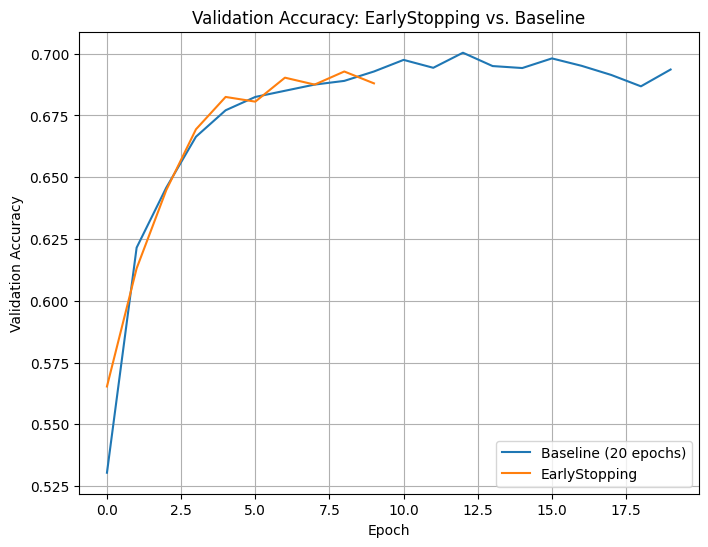

In [6]:
# plot validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_baseline.history['val_accuracy'], label='Baseline (20 epochs)')
plt.plot(history_earlystop.history['val_accuracy'], label='EarlyStopping')
plt.title('Validation Accuracy: EarlyStopping vs. Baseline')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# evaluate both models
test_loss_base, test_acc_base = baseline_model.evaluate(x_test, y_test, verbose=0)
test_loss_es, test_acc_es = earlystop_model.evaluate(x_test, y_test, verbose=0)

print(f"Test Accuracy - Baseline:     {test_acc_base:.4f}")
print(f"Test Accuracy - EarlyStopping: {test_acc_es:.4f}")

Test Accuracy - Baseline:     0.6825
Test Accuracy - EarlyStopping: 0.6907
